In [1]:
import datetime as dt
import os, sys
import netCDF4 as nc
import matplotlib as mpl
import numpy as np
import numpy.ma as ma
from scipy.spatial import distance
import matplotlib
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib import cm
import matplotlib.colors as mpl_colors
from matplotlib import rc
from mpl_toolkits.axes_grid1 import make_axes_locatable
from dateutil.relativedelta import relativedelta



import numpy as np
import datetime as dtm
import dateutil.parser as dparser
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# from mpl_toolkits.basemap import Basemap (rotate, ben's suggestion)



from salishsea_tools import geo_tools, viz_tools

get_ipython().magic('matplotlib inline')

In [2]:

filesdir = "/ocean/gsgarbi/selected_days/"

dirs = os.listdir(filesdir)



Iona = (-123.30898284912109, 49.187351226806641)
S15 = (-123.3114, 49.130412)
S16 = (-123.317415, 49.1214)
xl=(-126.2,-122.2)
yl=(47.1,51)

In [3]:
def param(timef):
    
    size = 5
    ms = 5
    S15 = (-123.3114, 49.130412)
    S16 = (-123.317415, 49.1214) 
    bathy = nc.Dataset("/ocean/gsgarbi/bathy_meter_SalishSea2.nc")
    model_lats = bathy.variables['nav_lat'][:]
    model_lons = bathy.variables['nav_lon'][:]
    depth = bathy.variables['Bathymetry'][:]        
    #End of spit
    late = 49.205
    lone = -123.26
    #Further up spit
    lats = 49.214
    lons = -123.22
        
    dx = 1.2
    lat = late + dx * (late - lats)
    lon = lone + dx * (lone - lons)
    y, x = geo_tools.find_closest_model_point(lon, lat, model_lons, model_lats)

    outy = y - 1
    outx = x - 1
    
    deep = 110
    shallow = 35
    
    time_0 = 0
    
    time_f = 2
    
    new_limx = (-124.5,-122.5)
    
    new_limy = (48.7,49.5)

    
    new_ticksx = (new_limx[0], float(sum(new_limx))/2, new_limx[1])
    
    new_ticksy = (new_limy[0], float(sum(new_limy))/2, new_limy[1])
                       
    
    Iona =(model_lons[outy, outx], model_lats[outy, outx])
    
    
    
    #norm_p = mpl_colors.Normalize(vmin=deep, vmax=shallow)
    
    norm_w = None
    cmap_w = "winter_r"
    
    norm_p = mpl_colors.Normalize(vmin=time_0, vmax=timef)
    cmap_p = plt.cm.plasma_r
      

    
   

        
    global fig, axs
    
    fig, axs = plt.subplots(LIN,COL, figsize = (5,4))

    
    if LIN == 1 or COL == 1:
        
        axs=np.reshape(axs,(1,1))
    
    
    
    for j in range(LIN):
        for k in range (COL):
            
            divider = make_axes_locatable(axs[j,k])
            
            cax_w = divider.append_axes("right", size="5%", pad=0.05)
            
            cax_p = divider.append_axes("bottom", size="5%", pad=0.5)
            
            
            cb_w = mpl.colorbar.ColorbarBase(cax_w, 
                                             cmap = mpl.cm.get_cmap('winter_r'),
                                             norm = mpl.colors.Normalize(vmin=shallow, 
                                                                         vmax=deep),
                                             orientation='vertical')

            
            cb_p = mpl.colorbar.ColorbarBase(cax_p, 
                                             cmap = plt.cm.plasma_r,
                                             norm = mpl.colors.Normalize(vmin=0, 
                                                                         vmax=timef*24),
                                             orientation='horizontal')
            
            
            
            
            
            
            cb_w.set_label("Water Depth (m)")
            
            cb_p.set_label("Time (hours)")
    
    
    
    
            mesh_w = axs[j,k].pcolormesh(model_lons, model_lats, depth, cmap=cmap_w)
    

            
    
            axs[j,k].set_xlim(new_limx)
            axs[j,k].set_xticks(new_ticksx)
            axs[j,k].set_xticklabels(('%s W' %-new_limx[0], 
                                      '%s W' %-round(float(sum(new_limx))/2,2), 
                                      '%s W' %-new_limx[1]))
            axs[j,k].set_xlabel('Longitude')
            
            axs[j,k].set_ylim(new_limy)
            axs[j,k].set_yticks(new_ticksy)
            axs[j,k].set_yticklabels(('%s N' %new_limy[0], 
                                      '%s N' %round(float(sum(new_limy))/2,1), 
                                      '%s N' %new_limy[1]))
            axs[j,k].set_ylabel('Latitude')
            
            
            #Iona
            axs[j,k].plot(Iona[0], Iona[1], 'wo', ms = ms)
            #New Stations
    
            axs[j,k].plot(S15[0],S15[1], 'wo', ms = ms)
            
            axs[j,k].plot(S16[0],S16[1], 'wo', ms = ms)
            
            axs[j,k].annotate(
            "Iona outfall",
            xy=(model_lons[outy, outx], model_lats[outy, outx]), xytext=(50, 10),
            textcoords='offset points', ha='left', va='bottom',
            #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
            
            axs[j,k].annotate(
            "Station 15",
            xy=(S15[0],S15[1]), xytext=(50, 10),
            textcoords='offset points', ha='left', va='bottom',
            #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
    
            axs[j,k].annotate(
            "Station 16",
            xy=(S16[0],S16[1]), xytext=(50, 10),
            textcoords='offset points', ha='left', va='top',
            #bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
            arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
        
    

    return axs

# In[31]:|

    


In [4]:

#72 particulas por dia e 72 pontos por dia por trajetoria

RAWDIR = "/ocean/gsgarbi/analysis-giorgio/time_series/results2/2016+jan2017/"
    
OUTPUTDIR = "/ocean/gsgarbi/selected_days/"

H = 24

pph = 3

ppd = H * pph

depths_num = 3

traj_len = 2 # traj len in days

date = dt.datetime(2016, 7, 18)

def find_direct (direct = RAWDIR, date = date):
    y = str(date.year)
    m = str(date.month)
    if len (m) == 1:
        m = "0"+str(m)
    
    direct = [i for i in os.listdir(direct) if y+m == i[:6]]
    
    return direct[0]
    

def get_points(direct, date):
    pts = []
    d = date.day
    

    
    parts = range (1 + d*ppd - ppd, d*ppd+1)
    part = parts[0]
       
    with open(RAWDIR + direct + "/traj.txt") as file:

        count = 0
        traj = []

        
        for i, line in enumerate(file):                  
            line = line.strip('\n').split()
            line = [float(k) for k in line]
            if line[0] == part:
                traj.append(line)
                count +=1
            if count == traj_len*ppd:
                pts.append(traj)
                traj = []
                count = 0
                part += 1
            if part == parts[-1]+1:
                break 
        



    return pts



In [5]:
LIN = 1
COL = 1                                                                        

                 

                                                       


2016-07-18 00:00:00


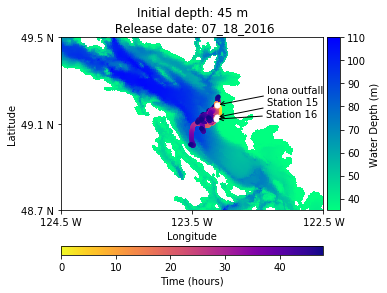

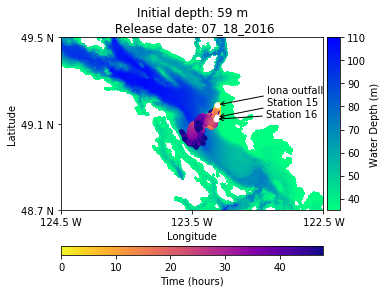

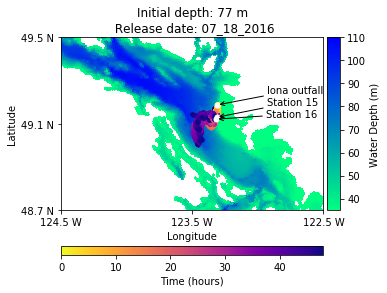

2016-07-25 00:00:00


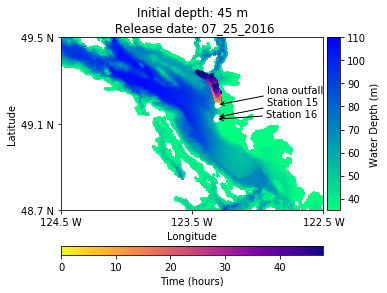

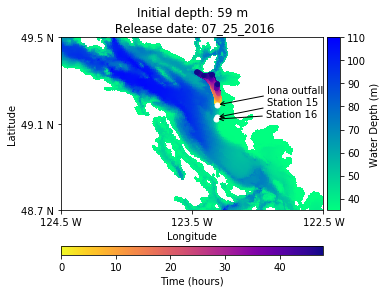

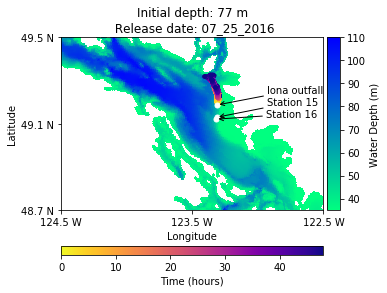

2016-08-01 00:00:00


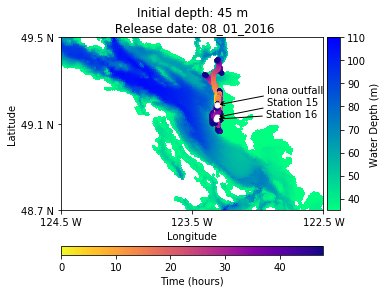

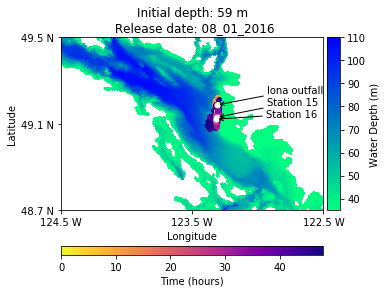

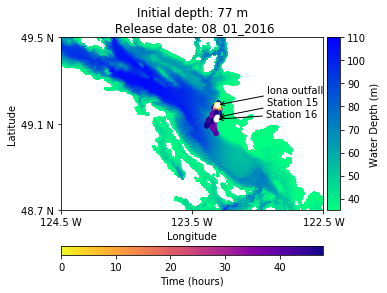

2016-08-08 00:00:00


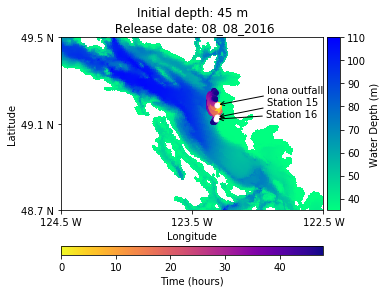

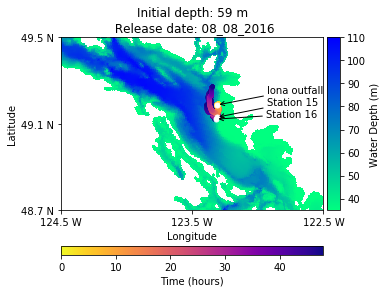

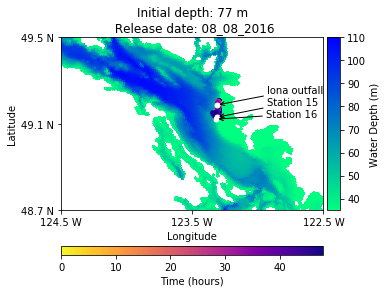

2016-08-15 00:00:00


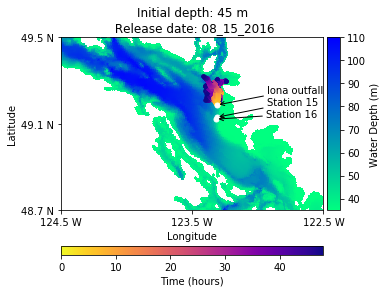

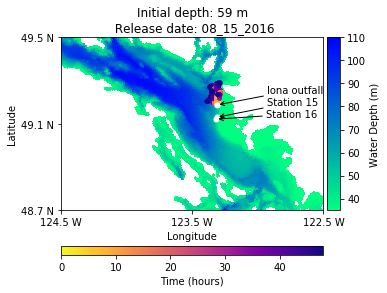

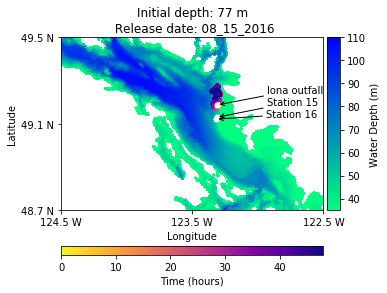

2016-08-22 00:00:00


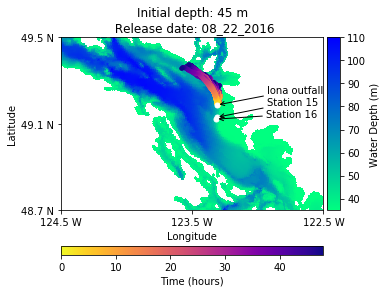

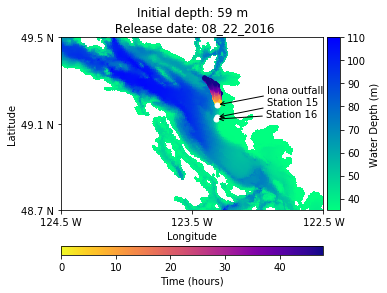

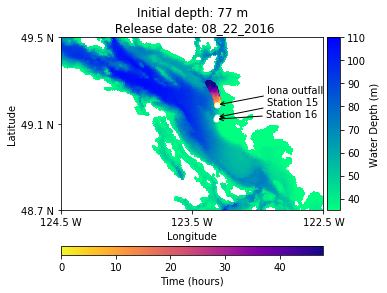

In [6]:
times_day_before = np.array(
    [
    dt.datetime(2016, 7, 19),
    dt.datetime(2016, 7, 26),
    dt.datetime(2016, 8, 2),
    dt.datetime(2016, 8, 9),
    dt.datetime(2016, 8, 16),
    dt.datetime(2016, 8, 23),
    ]
                            ) - dt.timedelta(days = 1)

init_depths = [45,59,77]


for date in times_day_before:
    
    print (date)



    direct = find_direct(date = date)



    pts = get_points(direct, date)






    for i_0 in range(3):
        
        axs = param(traj_len)

        for part in pts[i_0::3]:

            end = len(part)

            for t in range (end):

                scaled_t = 1-(end - t)/ end
                cmap = plt.cm.plasma_r
                color = cmap(scaled_t)
                axs[0,0].scatter(part[t][1], part[t][2], 10,
                                 c = color, edgecolor = None)
                
                fdate = date.strftime('%m_%d_%Y')
                
                axs[0,0].set_title("Initial depth: {} m\n ".format(init_depths[i_0]) + 
                                   "Release date: {}".format(fdate)
                                                            )
                                  
        
        plt.savefig(fig.savefig(
            "/ocean/gsgarbi/MEOPAR/private-docs/reports"+
            "/IonaProject/ionafigs/cs_{}_{}d_{}.png".format(fdate, 
                                                         traj_len, 
                                                         init_depths[i_0]) ) )
        
        plt.show()




#         viz_tools.set_aspect(axs[0,0])
    







In [7]:
print (             "/IonaProject/ionafigs/cs_{}_{}d_{}.png".format(fdate, 
                                                         traj_len, 
                                                         init_depths[i_0]) )

/IonaProject/ionafigs/cs_08_22_2016_2d_77.png


# 